In [5]:
from google.cloud import bigquery

In [6]:
client = bigquery.Client()

query = """
SELECT *
FROM `diabetes-readmission-data.diabetes_readmission_dataset_silver.diabetes_cleaned`
"""

df = client.query(query).to_dataframe()

In [10]:
df.shape
df.dtypes

encounter_id                object
patient_id                  object
race                        object
gender                      object
age                         object
admission_type              object
discharge_disposition       object
admission_source            object
time_in_hospital             Int64
num_lab_procedures           Int64
num_procedures               Int64
num_medications              Int64
number_outpatient            Int64
number_emergency             Int64
number_inpatient             Int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             Int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [8]:
import matplotlib.pyplot as plt
import numpy as np

Readmission 30 days distribution:
readmitted_30_days
0    76239
1     9900
Name: count, dtype: Int64


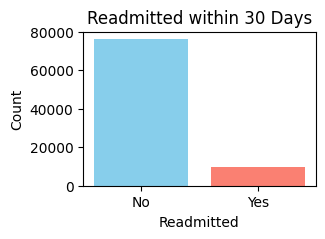

In [26]:
# Readmission distribution
print("Readmission 30 days distribution:")
print(df['readmitted_30_days'].value_counts())

readmit_count = df['readmitted_30_days'].value_counts().values

plt.figure(figsize=(3, 2))
plt.bar(readmit_labels, readmit_count, color=['skyblue', 'salmon'])
plt.title('Readmitted within 30 Days')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.ylabel('Count')
plt.xlabel('Readmitted')
plt.show()

Age distribution:
age
[70-80)     21604
[60-70)     19209
[50-60)     14900
[80-90)     14311
[40-50)      8298
[30-40)      3310
[90-100)     2260
[20-30)      1468
[10-20)       634
[0-10)        145
Name: count, dtype: int64


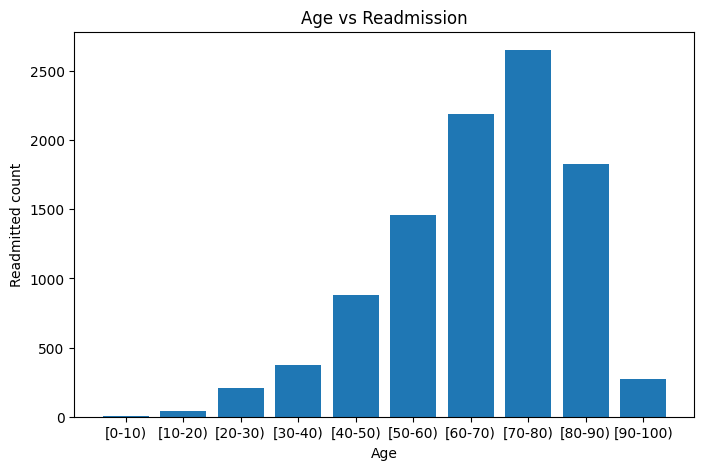

In [35]:
# Age distribution
print("Age distribution:")
print(df['age'].value_counts())

plt.figure(figsize=(8, 5))
age_count = df.groupby('age')['readmitted_30_days'].sum()
plt.bar(age_count.index, age_count.values)
plt.title('Age vs Readmission')
plt.ylabel('Readmitted count')
plt.xlabel('Age')
plt.show()

Race distribution:
race
Caucasian          65419
AfricanAmerican    17059
Hispanic            1742
Other               1326
Asian                593
Name: count, dtype: int64


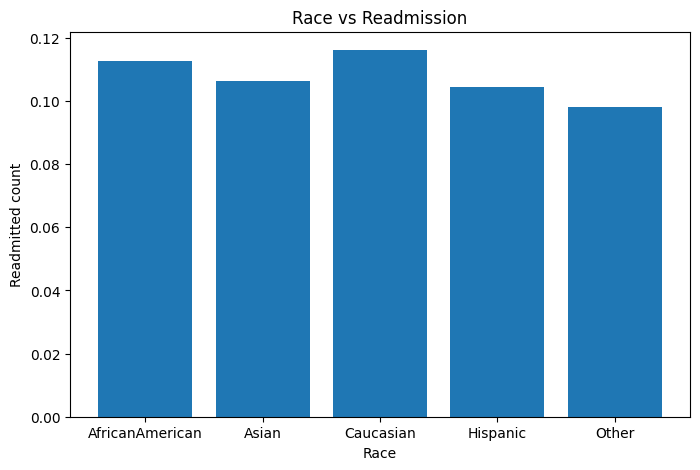

In [37]:
# Race distribution
print("Race distribution:")
print(df['race'].value_counts())

plt.figure(figsize=(8, 5))
race_count = df.groupby('race')['readmitted_30_days'].mean()
plt.bar(race_count.index, race_count.values)
plt.title('Race vs Readmission')
plt.ylabel('Readmitted count')
plt.xlabel('Race')
plt.show()

Admission type distribution:
admission_type
Emergency        48530
Elective         17280
Urgent           16512
Not Available     3791
Trauma Center       17
Newborn              9
Name: count, dtype: int64


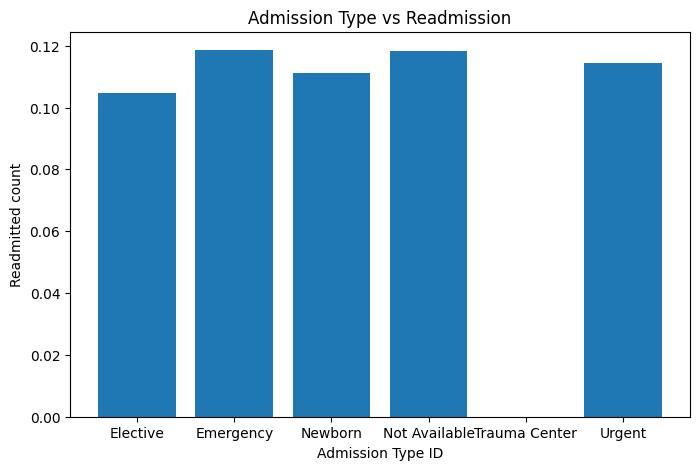

In [39]:
# Admission type distribution
print("Admission type distribution:")
print(df['admission_type'].value_counts())

plt.figure(figsize=(8, 5))
admission_type_count = df.groupby('admission_type')['readmitted_30_days'].mean()
plt.bar(admission_type_count.index, admission_type_count.values)
plt.title('Admission Type vs Readmission')
plt.ylabel('Readmitted count')
plt.xlabel('Admission Type ID')
plt.show()

Gender distribution:
gender
Female    46565
Male      39574
Name: count, dtype: int64


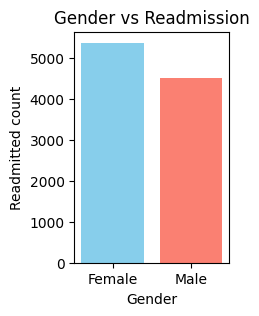

In [47]:
# Gender distribution
print("Gender distribution:")
print(df['gender'].value_counts())

plt.figure(figsize=(2, 3))
gender_count = df.groupby('gender')['readmitted_30_days'].sum()
plt.bar(gender_count.index, gender_count.values, color=['skyblue', 'salmon'])
plt.title('Gender vs Readmission')
plt.ylabel('Readmitted count')
plt.xlabel('Gender')
plt.show()

Discharge disposition distribution:
discharge_disposition
Home        67022
Transfer    18435
Other         682
Name: count, dtype: int64


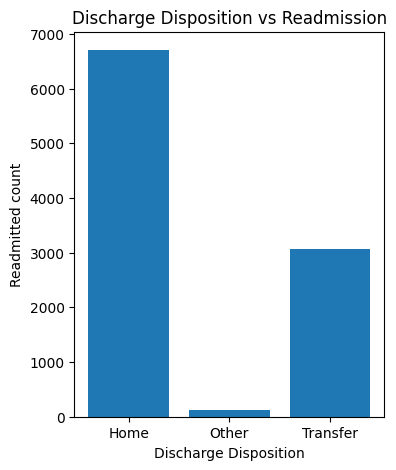

In [49]:
# Discharge disposition distribution
print("Discharge disposition distribution:")
print(df['discharge_disposition'].value_counts())

plt.figure(figsize=(4, 5))
discharge_disposition_count = df.groupby('discharge_disposition')['readmitted_30_days'].sum()
plt.bar(discharge_disposition_count.index, discharge_disposition_count.values)
plt.title('Discharge Disposition vs Readmission')
plt.ylabel('Readmitted count')
plt.xlabel('Discharge Disposition')
plt.show()

Admission source distribution:
admission_source
Emergency    52725
Referral     28315
Transfer      5099
Name: count, dtype: int64


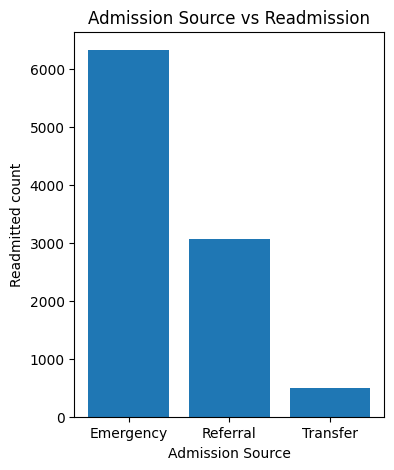

In [50]:
# Admission source distribution
print("Admission source distribution:")
print(df['admission_source'].value_counts())

plt.figure(figsize=(4, 5))
admission_source_count = df.groupby('admission_source')['readmitted_30_days'].sum()
plt.bar(admission_source_count.index, admission_source_count.values)
plt.title('Admission Source vs Readmission')
plt.ylabel('Readmitted count')
plt.xlabel('Admission Source')
plt.show()